In [3]:
# Plotting electrochemical data from Biologic data files

In [1]:
import eclabfiles as ecf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import py_figures_functions as pyf

%matplotlib inline

from matplotlib.pyplot import rc
rc("text", usetex=True)
rc("font", **{"family":"sans-serif","sans-serif":["Helvetica"]},size="14")
rc("text.latex",preamble=r"\usepackage{sfmath}")

In [2]:
# import data
# must be in .mpr format

abs_path = "C:/Users/sincl/Documents/MaughanLab/11-ID-B/Operando_XPDF_Dec2022/"

cell_folder = "cell4_Li2-9In0-9Zr0-1Cl6/echem_cell4/Cycling/"
path = abs_path + cell_folder

EIS = pyf.import_biologic_EIS(path)

#In9Zr1_100uA_c4_03_PEIS_C01.mpr

Data file: In9Zr1_100uA_c4_03_PEIS_C01


In [3]:
#ENTER NUMBER OF DATA POINTS PER EIS CYCLE
num_pts = 42

# separate cycles
pyf.sort_eis(EIS)
EIS_cycles, num_cycles = pyf.sep_eis_cycles(EIS, num_pts)

# Number of cycles should be a whole number

Number of cycles: 5


In [4]:
# STATIC VARIABLES

# tile
title = "Li$_{2.9}$In$_{0.9}$Zr$_{0.1}$Cl$_6$"

# current density in uA/cm^2
curr_dens = 100

# x-axis label
x_label = "$-$Z$_{\mathrm{imag}}$ (k$\Omega$)"
# y-axis label

y_label = "$-$Z$_{\mathrm{imag}}$ (k$\Omega$)"

# reformat axes? be sure units on axis labels are correct
reformat = True

In [5]:
# PLOT VARIABLES

# title text position
title_pos = (10000, 475000)

# number of cycles text position
num_cycles_pos = (10000, 450000)

# current density text position
curr_dens_pos = (340000, 475000)

# gradient colors
start_color = "#00b8ff"
end_color = "#bd00ff"

# axis limit
ax_range = (0, 500000)

# save a PNG image of graph? 
savePNG = False
# file name
fn = "cell4_100uA_EIS"
# save directory
save_dir = "C:/Users/sincl/Desktop/"

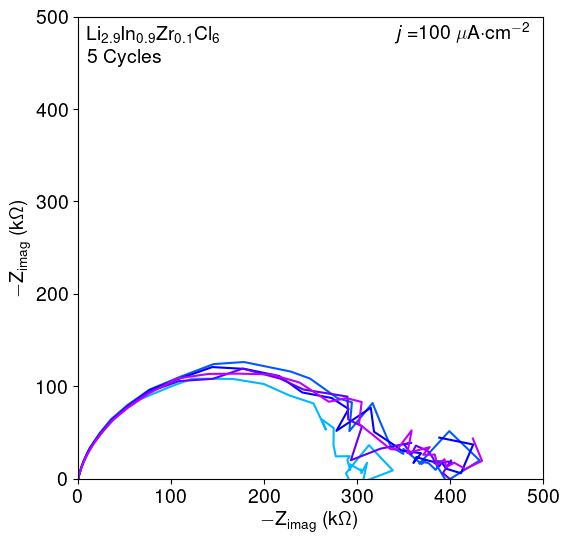

In [7]:
# generates plot
fig, eis_plot = plt.subplots(1, 1, figsize=(6,6))
colors_eis = pyf.gradient_gen(start_color, end_color, num_cycles)

for i in EIS_cycles:
    eis_plot.plot(EIS_cycles[i]["Re(Z)"], EIS_cycles[i]["-Im(Z)"], color = colors_eis[i].hex)

eis_plot.set_ylabel(x_label)
eis_plot.set_xlabel(y_label)
eis_plot.set_xlim(ax_range)
eis_plot.set_ylim(ax_range)

if reformat == True:
    formatter = FuncFormatter(pyf.reformat_ticks)
    eis_plot.xaxis.set_major_formatter(formatter)
    xticks = eis_plot.xaxis.get_major_ticks()
    eis_plot.yaxis.set_major_formatter(formatter)
    yticks = eis_plot.yaxis.get_major_ticks()

eis_plot.text(title_pos[0], title_pos[1], title)
eis_plot.text(num_cycles_pos[0], num_cycles_pos[1], str(num_cycles) + " Cycles")
eis_plot.text(curr_dens_pos[0], curr_dens_pos[1], "$j=$" + str(curr_dens) + " $\mu$A$\cdot$cm$^{-2}$")

if savePNG == True:
    plt.savefig(save_dir + fn + ".png", bbox_inches='tight', dpi=1000) 